## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Feature Description
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(800, 13)

In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### 개별 피처 탐색

In [7]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [8]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

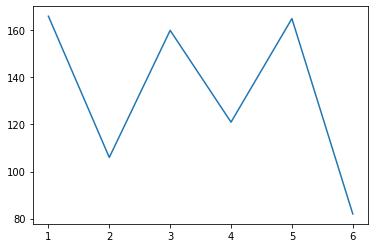

In [9]:
df['Generation'].value_counts().sort_index().plot()
# 홀수 세대에 몬스터가 더 많음을 알 수 있음

In [11]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [12]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
# 전체 타입의 수를 확인해보자
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

-----

### 2-2) 데이터 특징 탐색

##### 변수들의 분포 탐색

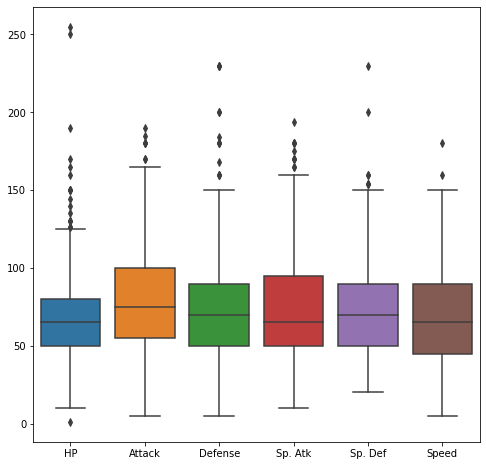

In [16]:
fig= plt.figure(figsize=(8,8))
ax=fig.gca()
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

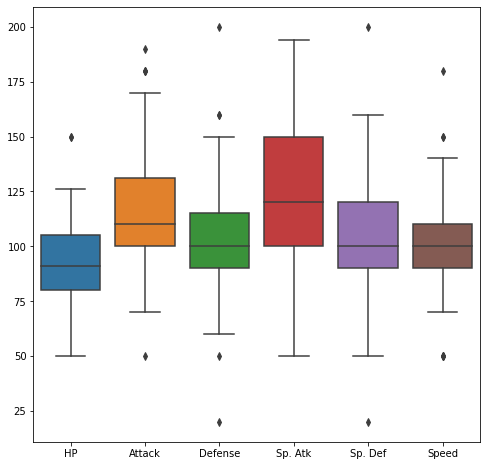

In [17]:
# legendary만 보기
fig= plt.figure(figsize=(8,8))
ax=fig.gca()
sns.boxplot(data=df[df['Legendary']==1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()
# legendary 대부분의 능력치가 높다  => 대부분의 능력치가 높으면 1(legendary)임을 알 수 있다.

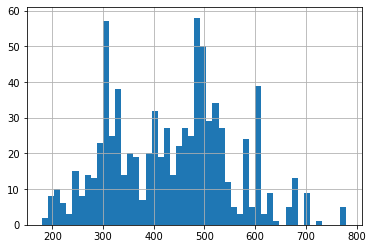

In [18]:
df['Total'].hist(bins=50)

##### Legendary 그룹별 탐색

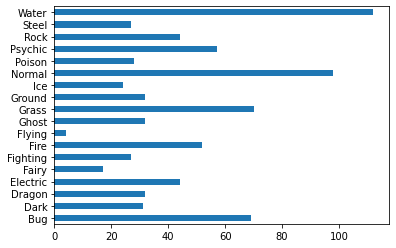

In [19]:
df['Type 1'].value_counts(sort=False).sort_index().plot.barh()
# water, flying 외에는 거의 비슷하게 분포

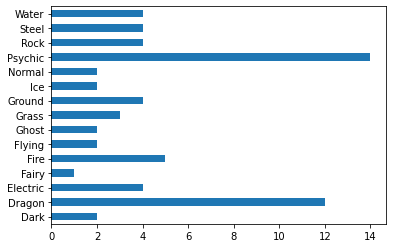

In [20]:
#legendary 는 psychic, dragon이 많음
df[df['Legendary']==1]['Type 1'].value_counts(sort=False).sort_index().plot.barh()

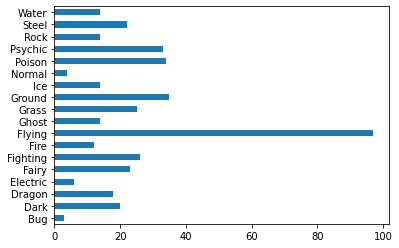

In [21]:
# 대부분 flying이네
df['Type 2'].value_counts(sort=False).sort_index().plot.barh()

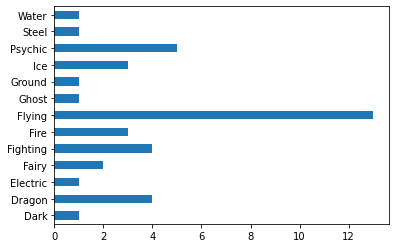

In [22]:
# legendary type2는 일반 몬스터와도 비슷한 분포
df[df['Legendary']==1]['Type 2'].value_counts(sort=False).sort_index().plot.barh()

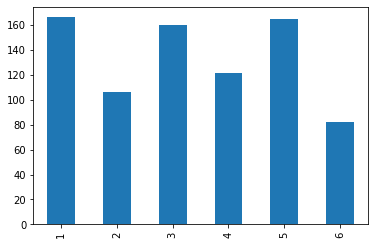

In [23]:
df['Generation'].value_counts().sort_index().plot.bar()

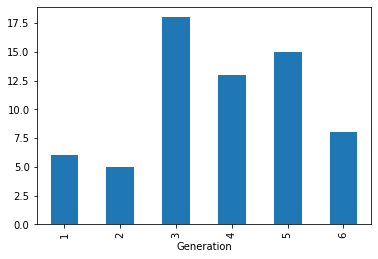

In [24]:
# legendary는 3~5세대에 많다
groups = df[df['Legendary']==1].groupby('Generation').size()
groups.plot.bar()

##### 포켓몬 능력 분포 탐색

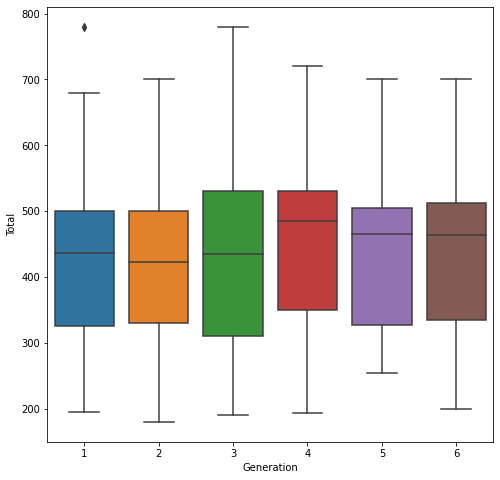

In [25]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "Generation", y = "Total", data=df, ax=ax)
plt.show()
# 세대간 차이는 크게 없어보임

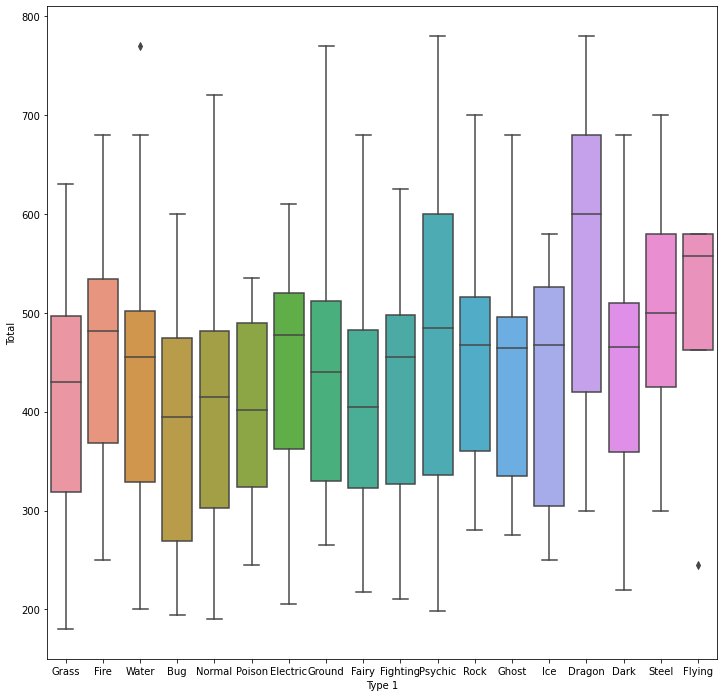

In [26]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "Type 1", y = "Total", data=df, ax=ax)
plt.show()
# dragon, flying의 total값이 높은편이다 => 이게 과연 legendary일 확률이 높다는 것과 연관이 있을까

-----

## 3) 지도 학습 기반 분류 분석

### 3-1) 데이터 전처리

##### 데이터 타입 변경

In [27]:
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)
preprocessed_df = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


##### one-hot encoding

In [28]:
encoded_df = pd.get_dummies(preprocessed_df['Type 1']) # dummies가 자동으로 분류해줌
encoded_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# pokemon type list 생성
def make_list(x1, x2):
    type_list = []  # Type 1은 결측값 없음
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2) # Type1,2 합치기
    return type_list

preprocessed_df['Type'] = preprocessed_df.apply(lambda x: make_list(x['Type 1'], x['Type 2']), axis=1)
preprocessed_df.head()
# 합쳐진 Type이 생김

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [30]:
del preprocessed_df['Type 1']
del preprocessed_df['Type 2']

In [32]:
# multi label binarizer 적용
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(mlb.fit_transform(preprocessed_df.pop('Type')), columns=mlb.classes_))

In [33]:
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# generation만 onehot 해주면된다
preprocessed_df = pd.get_dummies(preprocessed_df)
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##### 피처 표준화

In [35]:
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
preprocessed_df[scale_columns] = scaler.fit_transform(preprocessed_df[scale_columns])
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##### 데이터셋 분리

In [38]:
from sklearn.model_selection import train_test_split

# dataset split to train/test
X = preprocessed_df.loc[:, preprocessed_df.columns != 'Legendary'] # legendary만 빼고 가져오기
y = preprocessed_df['Legendary']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [39]:
print(x_train.shape)
print(x_test.shape)

(600, 31)
(200, 31)


-----

### 3-2) Logistic Regression 모델 학습

##### 모델 학습

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train LR model
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# classifiacation predict
y_pred = lr.predict(x_test)

##### 모델 평가

In [42]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))
# 정확도는 높게 나왔지만, 정밀도, f1_score는 낮게나옴

accuracy: 0.95
Precision : 0.615
Recall : 0.667
F1 : 0.640


In [43]:
from sklearn.metrics import confusion_matrix

# print confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# class의 불균형을 확인 할 수 있다. => 정확도만 높아지는 이유

[[183   5]
 [  4   8]]


-----

### 3-3) 클래스 불균형 조정

In [44]:
preprocessed_df['Legendary'].value_counts()
# 거의 10:1의 비율로 나눠짐

0    735
1     65
Name: Legendary, dtype: int64

##### 1:1 샘플링

In [45]:
# 65개씩만 가져오기
positive_random_idx = preprocessed_df[preprocessed_df['Legendary']==1].sample(65, random_state=33).index.tolist()
negative_random_idx = preprocessed_df[preprocessed_df['Legendary']==0].sample(65, random_state=33).index.tolist()

In [ ]:
positive_random_idx

##### 데이터셋 분리

In [47]:
# 다시 분리해서 작업하기
random_idx = positive_random_idx + negative_random_idx
X = preprocessed_df.loc[random_idx, preprocessed_df.columns != 'Legendary']
y = preprocessed_df['Legendary'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [48]:
print(x_train.shape)
print(x_test.shape)

(97, 31)
(33, 31)


##### 모델 재학습

In [49]:
# Train LR model
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# classifiacation predict
y_pred = lr.predict(x_test)

In [51]:
# classification result for test dataset
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))
# 정확도, 정밀도가 많이 개선되었음

accuracy: 0.97
Precision : 0.923
Recall : 1.000
F1 : 0.960


In [52]:
# print confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[20  1]
 [ 0 12]]


## 4) 비지도 학습 기반 군집 분류 분석

### 4-1) Kmeans 군집 분류

##### 2차원 군집 분석 (Kmeans)

k: 1 | cost: 1600.0
k: 2 | cost: 853.3477298974242
k: 3 | cost: 642.4259559026584
k: 4 | cost: 480.49450250321513
k: 5 | cost: 403.83723561990854


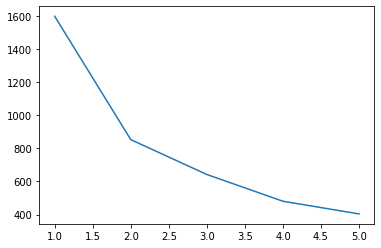

In [53]:
from sklearn.cluster import KMeans

# K-means train & Elbow method
X = preprocessed_df[['Attack', 'Defense']]

k_list = []
cost_list = []
for k in range (1, 6):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

# 2개, 4개인 지점에서 효과가 좋을것 같지만, 애매하니 4로 하자

In [54]:
# selected by elbow method (4)
kmeans = KMeans(n_clusters=4).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [55]:
print(preprocessed_df['cluster_num'].value_counts())

0    309
1    253
3    128
2    110
Name: cluster_num, dtype: int64


##### 군집 시각화

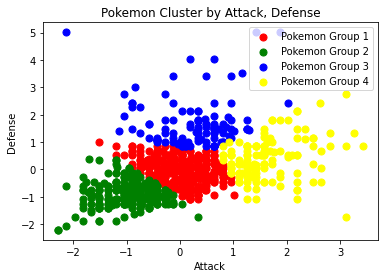

In [56]:
# Visualization
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 0]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 0]['Defense'], 
            s = 50, c = 'red', label = 'Pokemon Group 1')

plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 1]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 1]['Defense'], 
            s = 50, c = 'green', label = 'Pokemon Group 2')

plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 2]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 2]['Defense'], 
            s = 50, c = 'blue', label = 'Pokemon Group 3')

plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 3]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 3]['Defense'], 
            s = 50, c = 'yellow', label = 'Pokemon Group 4')

plt.title('Pokemon Cluster by Attack, Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

##### 다차원 군집 분석 (Kmeans)

k: 1 | cost: 4800.0
k: 2 | cost: 3275.3812330305977
k: 3 | cost: 2862.109527022669
k: 4 | cost: 2566.7232220108694
k: 5 | cost: 2328.1457646454983
k: 6 | cost: 2192.5762532046347
k: 7 | cost: 2059.14575719798
k: 8 | cost: 1949.7076303312488
k: 9 | cost: 1858.7893509095047
k: 10 | cost: 1779.353635285906
k: 11 | cost: 1707.9635744618404
k: 12 | cost: 1650.230353170712
k: 13 | cost: 1603.4701307305809
k: 14 | cost: 1534.0235556598404


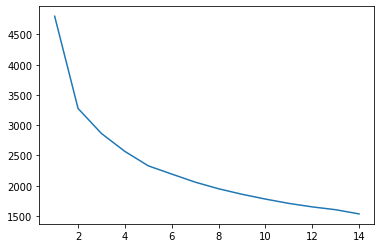

In [57]:
# 이번엔 다양한 요소를 넣어보자

X = preprocessed_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

k_list = []
cost_list = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)
# 5~6정도가 적당해보임 => 5로 지정

In [58]:
# selected by elbow method (5)
kmeans = KMeans(n_clusters=5).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


##### 군집별 특성 시각화

In [ ]:
# 차원이 많아서, 각 파라미터를 가지고 확인해보는것도 방법이다

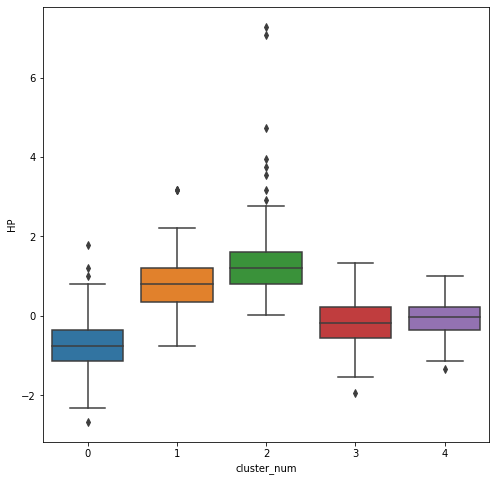

In [59]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "HP", data=preprocessed_df, ax=ax)
plt.show()

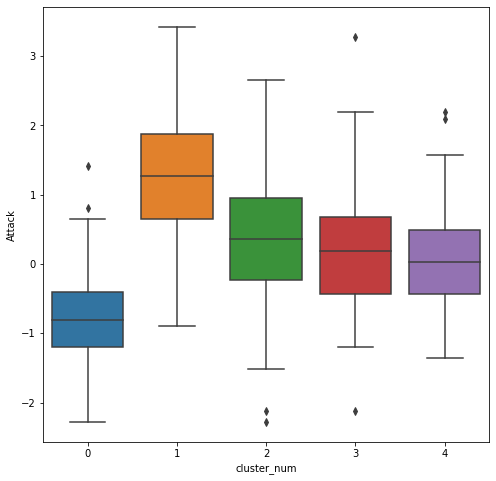

In [60]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Attack", data=preprocessed_df, ax=ax)
plt.show()

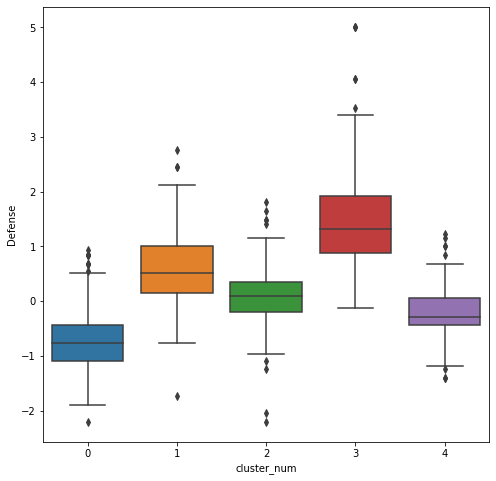

In [61]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Defense", data=preprocessed_df, ax=ax)
plt.show()

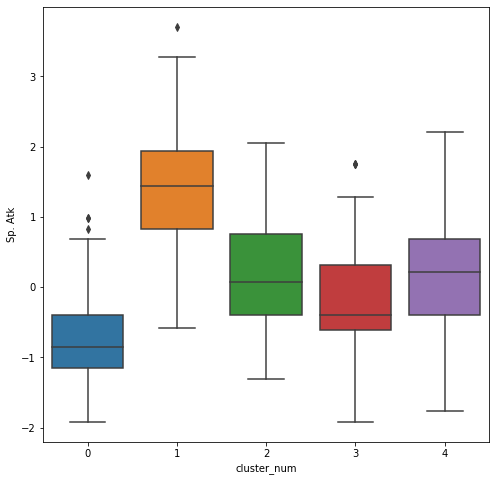

In [62]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Sp. Atk", data=preprocessed_df, ax=ax)
plt.show()

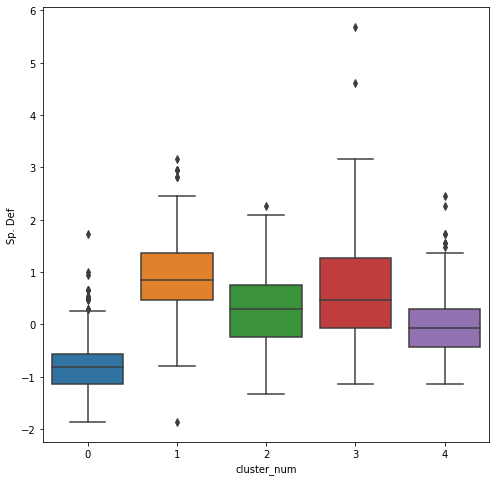

In [63]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Sp. Def", data=preprocessed_df, ax=ax)
plt.show()

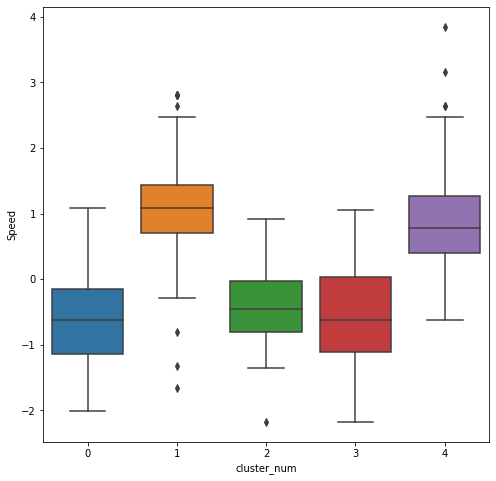

In [64]:
fig = plt.figure(figsize = (8, 8))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Speed", data=preprocessed_df, ax=ax)
plt.show()

In [ ]:
# 특성대로 군집 분류를 했을 경우, 군집의 특징을 확인 할 수 있다 => 다양한 분석이 가능하다